In [143]:
from sklearn import datasets #載入 sklearn
import pandas as pd
iris = datasets.load_iris();
iris.keys()
x = pd.DataFrame(iris['data'],columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target_names'])
data = pd.concat([x,y], axis=1)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


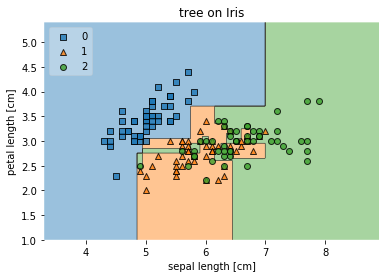

30
9
準確率: 0.7
It cost 0.004000 seconds


In [218]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split #載入資料測驗模組
from sklearn.tree import DecisionTreeClassifier  #載入決策樹模組
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
iris = datasets.load_iris();
X=iris.data[:, 0:2]
y=iris.target
#設定 20% 的測驗資料
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#開始決策樹運算
tree = DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=0)
tree.fit(X_train, y_train) #學習
pretest = tree.predict(X_test)  #測驗
# Plotting decision regions
plot_decision_regions(X, y, clf=tree, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('tree on Iris')
plt.show()



error = 0
count = 0
tStart = time.time()
for i, v in enumerate(tree.predict(X_test)):
    count += 1
    if v != y_test[i]:
        error += 1
print(count)
print(error)
accuracy = metrics.accuracy_score(y_test, pretest)
print("準確率:",accuracy)
tEnd = time.time()
print("It cost %f seconds"% (tEnd-tStart))

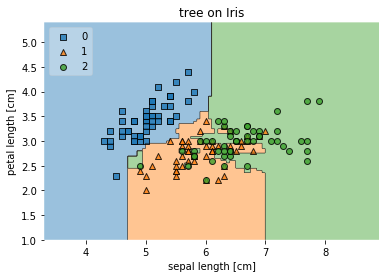

30
7
準確率: 0.7666666666666667
It cost 0.104964 seconds


In [221]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split #載入資料測驗模組
from sklearn.ensemble import RandomForestClassifier#隨機森林
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
iris = datasets.load_iris();
X=iris.data[:, 0:2]
y=iris.target
#設定 20% 的測驗資料
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

forest = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=3, n_jobs=2)
forest.fit(X_train, y_train) #學習
pretest = forest.predict(X_test)

plot_decision_regions(X, y, clf=forest, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('tree on Iris')
plt.show()

error = 0
count = 0
tStart = time.time()
for i, v in enumerate(forest.predict(X_test)):
    count += 1
    if v != y_test[i]:
        error += 1
print(count)
print(error)
accuracy = metrics.accuracy_score(y_test, pretest)
print("準確率:",accuracy)
tEnd = time.time()
print("It cost %f seconds"% (tEnd-tStart))

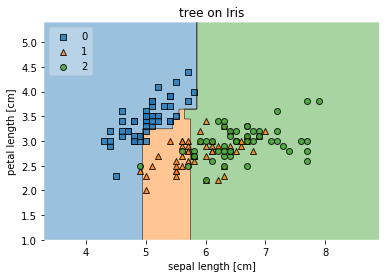

7 1
10 1
11 2
12 2
16 2
20 2
23 1
24 2
25 0
27 2
29 2
30
11
準確率: 0.6333333333333333
It cost 0.023992 seconds


In [224]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split #載入資料測驗模組
from sklearn import cross_validation, ensemble, preprocessing, metrics
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
iris = datasets.load_iris();
X=iris.data[:, 0:2]
y=iris.target
#設定 20% 的測驗資料
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# 建立AdaBoost 模型
boost = ensemble.AdaBoostClassifier(n_estimators = 100)
boost.fit(X_train, y_train)
pretest = boost.predict(X_test)

plot_decision_regions(X, y, clf=boost, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('tree on Iris')
plt.show()


error = 0
count = 0
tStart = time.time()
for i, v in enumerate(boost.predict(X_test)):
    count += 1
    if v != y_test[i]:
        print(i, v)
        error += 1
print(count)
print(error)
accuracy = metrics.accuracy_score(y_test, pretest)
print("準確率:",accuracy)
tEnd = time.time()
print("It cost %f seconds"% (tEnd-tStart))

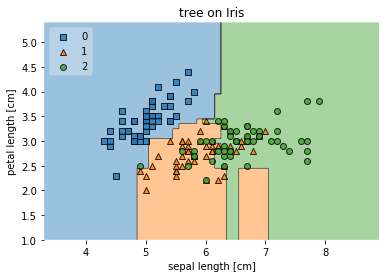

4 2
6 2
10 2
14 1
19 1
20 1
25 1
27 1
30
8
準確率: 0.7333333333333333
It cost 0.003998 seconds


In [226]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier      #Gradient Boosting 和 AdaBoost演算法#
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
iris = datasets.load_iris();
X=iris.data[:, 0:2]
y=iris.target
#設定 20% 的測驗資料
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# 建立 GBDT 模型
module = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
module.fit(X_train, y_train)
pretest = module.predict(X_test)


plot_decision_regions(X, y, clf=module, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('tree on Iris')
plt.show()

error = 0
count = 0
tStart = time.time()
for i, v in enumerate(module.predict(X_test)):
    count += 1
    if v != y_test[i]:
        print(i, v)
        error += 1
print(count)
print(error)
accuracy = metrics.accuracy_score(y_test, pretest)
print("準確率:",accuracy)
tEnd = time.time()
print("It cost %f seconds"% (tEnd-tStart))

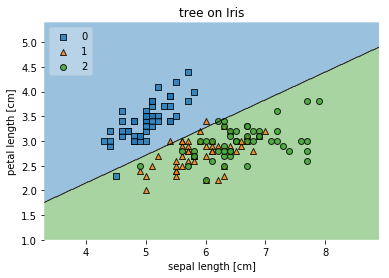

30
11
準確率: 0.6333333333333333
It cost 0.001999 seconds


In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import cluster, datasets
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
iris = datasets.load_iris();
X=iris.data[:, 0:2]
y=iris.target
#設定 20% 的測驗資料
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# 建立 多項單純貝氏分類器 模型
module = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
module.fit(X_train, y_train)
pretest = module.predict(X_test)

plot_decision_regions(X, y, clf=module, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('tree on Iris')
plt.show()

error = 0
count = 0
tStart = time.time()
for i, v in enumerate(module.predict(X_test)):
    count += 1
    if v != y_test[i]:
        error += 1
print(count)
print(error)
accuracy = metrics.accuracy_score(y_test, pretest)
print("準確率:",accuracy)
tEnd = time.time()
print("It cost %f seconds"% (tEnd-tStart))

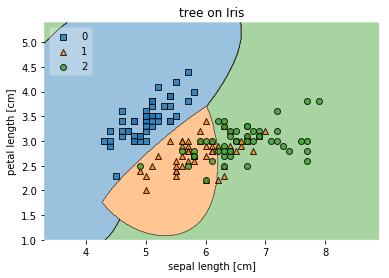

30
5
準確率: 0.8333333333333334
It cost 0.001998 seconds


In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import cross_validation, svm, preprocessing, metrics
from sklearn import cluster, datasets
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
iris = datasets.load_iris();
X=iris.data[:, 0:2]
y=iris.target
#設定 20% 的測驗資料
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# 建立 svm 模型
module = svm.SVC()
module.fit(X_train, y_train)
pretest = module.predict(X_test)

plot_decision_regions(X, y, clf=module, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('tree on Iris')
plt.show()

error = 0
count = 0
tStart = time.time()
for i, v in enumerate(module.predict(X_test)):
    count += 1
    if v != y_test[i]:
        error += 1
print(count)
print(error)
accuracy = metrics.accuracy_score(y_test, pretest)
print("準確率:",accuracy)
tEnd = time.time()
print("It cost %f seconds"% (tEnd-tStart))

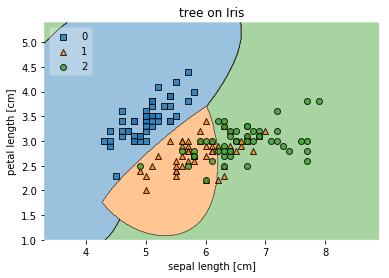

30
14
準確率: 0.5333333333333333
It cost 0.001000 seconds


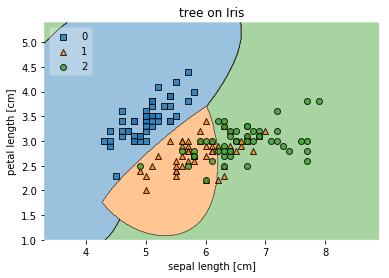

30
25
準確率: 0.16666666666666666
It cost 0.004998 seconds


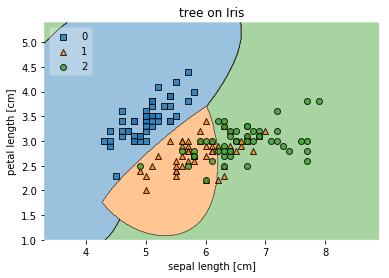

30
23
準確率: 0.23333333333333334
It cost 0.002001 seconds


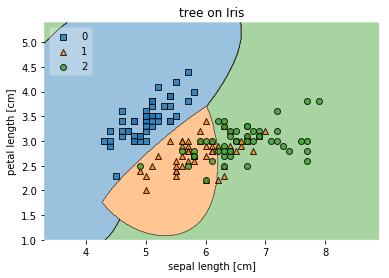

30
28
準確率: 0.06666666666666667
It cost 0.000999 seconds


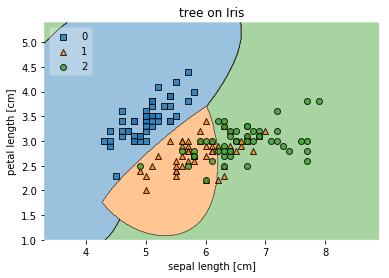

30
13
準確率: 0.5666666666666667
It cost 0.000999 seconds


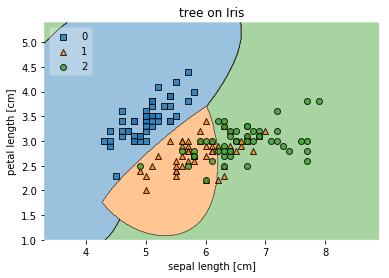

30
8
準確率: 0.7333333333333333
It cost 0.000999 seconds


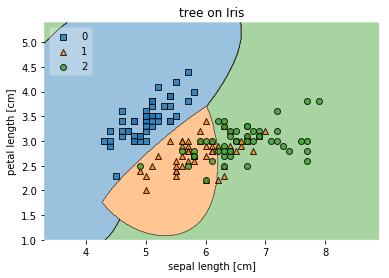

30
26
準確率: 0.13333333333333333
It cost 0.000999 seconds


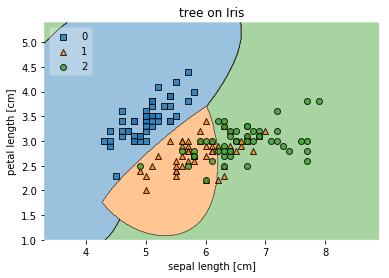

30
26
準確率: 0.13333333333333333
It cost 0.003002 seconds


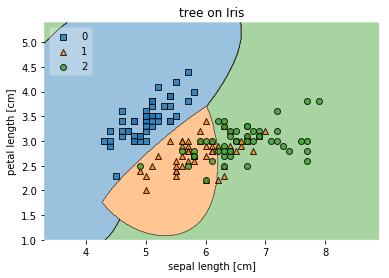

30
23
準確率: 0.23333333333333334
It cost 0.000999 seconds


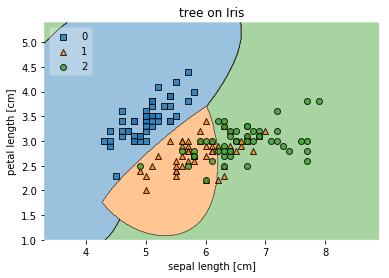

30
28
準確率: 0.06666666666666667
It cost 0.002999 seconds


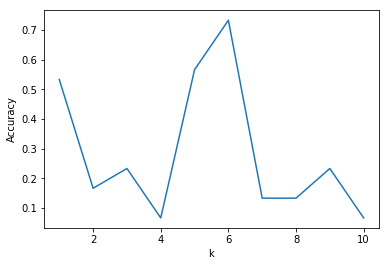

In [231]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split #載入資料測驗模組
from sklearn.cluster import KMeans                    #kmeans聚類#
from sklearn import cross_validation, ensemble, preprocessing, metrics
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
iris = datasets.load_iris();

#設定 20% 的測驗資料
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
ks = range(1, 11)

n_scores = []
for k in ks:
    X = iris.data[:, 0:2]
    y = iris.target
    
    #設定 20% 的測驗資料
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    #開始決策樹運算
    kmean = KMeans(n_clusters=3, random_state=0)
    kmean.fit(X_train, y_train) #學習
    pretest = kmean.predict(X_test)  #測驗
    plot_decision_regions(X, y, clf=module, legend=2)

    # Adding axes annotations
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title('tree on Iris')
    plt.show()
    error = 0
    count = 0
    tStart = time.time()
    for i, v in enumerate(kmean.predict(X_test)):
        count += 1
        if v != y_test[i]:
            error += 1
    print(count)
    print(error)
    accuracy = metrics.accuracy_score(y_test, pretest)
    print("準確率:",accuracy)
    tEnd = time.time()
    print("It cost %f seconds"% (tEnd-tStart))
    n_scores.append(accuracy_score(y_test, pretest))
    
    
plt.plot(ks,n_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


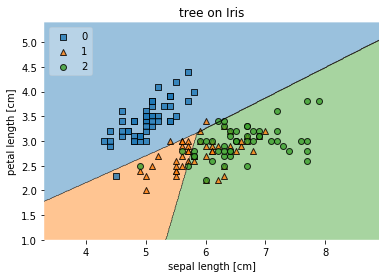

30
5
準確率: 0.8333333333333334
It cost 0.000998 seconds


In [232]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, linear_model
from sklearn import cluster, datasets
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
iris = datasets.load_iris();
X=iris.data[:, 0:2]
y=iris.target
#設定 20% 的測驗資料
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# 建立 Logistic 迴歸模型
module = linear_model.LogisticRegression()
module.fit(X_train, y_train)
pretest = module.predict(X_test)

plot_decision_regions(X, y, clf=module, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('tree on Iris')
plt.show()


error = 0
count = 0
tStart = time.time()
for i, v in enumerate(module.predict(X_test)):
    count += 1
    if v != y_test[i]:
        error += 1
print(count)
print(error)
accuracy = metrics.accuracy_score(y_test, pretest)
print("準確率:",accuracy)
tEnd = time.time()
print("It cost %f seconds"% (tEnd-tStart))

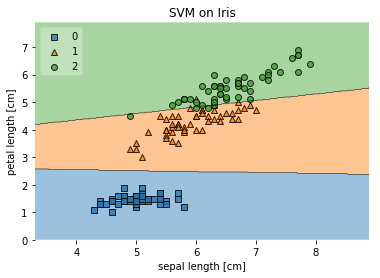

In [205]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()